# Stock Analysis and Back Testing a Stratergy

**Hypothesis:**

If all 75 ticks in a day is above 50 SMA, Trigger buy @ 3:25 pm. Stop Loss at first instance of close below 50 sma.

**Strategy:**

If the stock price is on rise throughout the day, trigger buy at the end of the day. Hold on to the stock till it is in increasing phase. Exit the stock when it shows the sign of decline.

Not to exit at first decline but instead if it goes lower than the average of last 50 instances.

## Import Liabraries 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import xlsxwriter
import openpyxl
from statistics import mean

## Import Stock Data 

- The data is stock price of **Bank Nifty**.

- We have data of **Open, High, Low, Close, SMA20, SMA50, SMA100**.

- The data starts from **July 2011** and goes till **January 2022**.

- The data is present of every **5 minute** interval starting from **9:15 am** and goes upto **3:25 pm**. 

- In total there are **75 intervals** in a day.

In [2]:
nse_data = pd.read_excel("Bank Nifty data 5 min.xlsx", header = 2)

In [3]:
nse_data.head()

,Date,Time,Open,High,Low,Close,SMA20,SMA50,SMA 100
0,2011-07-29,09:15:00,10820.65,10820.65,10758.40,10774.20,NaN,NaN,NaN
1,2011-07-29,09:20:00,10774.20,10812.40,10774.20,10807.95,NaN,NaN,NaN
2,2011-07-29,09:25:00,10807.95,10837.25,10804.35,10837.25,NaN,NaN,NaN
3,2011-07-29,09:30:00,10836.05,10891.45,10835.60,10884.80,NaN,NaN,NaN
4,2011-07-29,09:35:00,10884.80,10892.30,10871.85,10891.65,NaN,NaN,NaN


In [4]:
nse_data = nse_data.fillna(-1)
nse_data.head()

,Date,Time,Open,High,Low,Close,SMA20,SMA50,SMA 100
0,2011-07-29,09:15:00,10820.65,10820.65,10758.40,10774.20,-1.0,-1.0,-1.0
1,2011-07-29,09:20:00,10774.20,10812.40,10774.20,10807.95,-1.0,-1.0,-1.0
2,2011-07-29,09:25:00,10807.95,10837.25,10804.35,10837.25,-1.0,-1.0,-1.0
3,2011-07-29,09:30:00,10836.05,10891.45,10835.60,10884.80,-1.0,-1.0,-1.0
4,2011-07-29,09:35:00,10884.80,10892.30,10871.85,10891.65,-1.0,-1.0,-1.0


In [5]:
nse_data.tail()

,Date,Time,Open,High,Low,Close,SMA20,SMA50,SMA 100
192328,2022-01-24,15:05:00,36874.30,36946.70,36813.45,36946.70,36725.6400,36968.661,37242.978218
192329,2022-01-24,15:10:00,36946.55,37063.65,36929.50,37038.35,36735.3350,36960.372,37237.150000
192330,2022-01-24,15:15:00,37048.60,37073.95,36990.90,37050.30,36747.5000,36953.933,37231.681188
192331,2022-01-24,15:20:00,37047.80,37062.85,36894.25,36905.65,36751.2025,36944.372,37223.801980
192332,2022-01-24,15:25:00,36902.40,36945.05,36808.15,36834.90,36751.3125,36934.724,37215.664356


In [6]:
nse_data.describe()

,Open,High,Low,Close,SMA20,SMA50,SMA 100
count,192333.000000,192333.000000,192333.000000,192333.000000,192333.000000,192333.000000,192333.000000
mean,20697.310681,20713.934408,20679.911383,20697.032113,20694.677328,20690.957457,20684.575638
std,8219.052185,8224.819853,8212.829251,8218.886333,8220.118405,8222.057737,8225.221458
min,7772.600000,7801.950000,7766.350000,7772.600000,-1.000000,-1.000000,-1.000000
25%,12713.500000,12721.650000,12703.900000,12713.250000,12709.005000,12706.930000,12701.710396
50%,19198.800000,19214.450000,19180.700000,19197.900000,19198.837500,19194.966000,19185.750990
75%,26863.350000,26877.750000,26846.200000,26862.650000,26864.802500,26870.704000,26873.287624
max,41729.900000,41827.650000,41600.550000,41722.200000,41556.880000,41367.579000,41231.838614


In [7]:
nse_data.iloc[0]["Date"].year

2011

In [8]:
wb = openpyxl.Workbook()

#wb.create_sheet("Summary")
#ws = wb["Summary"]
ws = wb.active
ws.title = "Summary"

ws.column_dimensions['F'].width = 30
ws.column_dimensions['G'].width = 8
ws["A1"].value = """
This excel sheet contains output data gathered from backtesting strategy 1.
"""
wb.save('Strategy 1.xlsx')

workbook = xlsxwriter.Workbook('strategy1.xlsx')
worksheet = workbook.add_worksheet()
 
content = """
This excel sheet contains output data gathered from backtesting strategy 1. 
"""

worksheet.write(0,0, content)
worksheet.write(0,0, "1")
workbook.close()

## Find the number of days where all 75 ticks had close value greater than SMA50 

In [9]:
def num_days_buy_condition_true():
    condition_satisfied = condition_not_satisfied = 0

    for index in nse_data.index:
        if nse_data["Time"][index] == dt.time(9,15,0):
            counter = 0

        if nse_data["Close"][index] >= nse_data["SMA50"][index]:
            counter += 1
        else:
            counter = -1

        if nse_data["Time"][index] == dt.time(15,25,0):
            if counter == 75:
                # all 75 ticks satisfied the condition
                condition_satisfied += 1
            else:
                # condition failed
                condition_not_satisfied += 1
                
    return condition_satisfied, condition_not_satisfied

In [10]:
condition_satisfied, condition_not_satisfied = num_days_buy_condition_true()
print("Number of days condition was satisfied: " + str(condition_satisfied))
print("Number of days condition was not satisfied: " + str(condition_not_satisfied))


#ws["a2"] = "Number of days condition was satisfied: " + str(condition_satisfied)
#ws["a3"] = "Number of days condition was not satisfied: " + str(condition_not_satisfied)
#wb.save("Strategy 1.xlsx")

Number of days condition was satisfied: 146
Number of days condition was not satisfied: 2416


 ### Inference: This tells us that there were 146 days where the stock price of BANK NIFTY was on rise throughout the day.
 
 i.e. The price of stock at any point of time on that day was greater than the SMA50 (average of price of the last 50 points)

## Find the number of days where all 75 ticks had close value less than SMA50 

In [11]:
def num_days_stock_declining():
    condition_satisfied = condition_not_satisfied = 0

    for index in nse_data.index:
        if nse_data["Time"][index] == dt.time(9,15,0):
            counter = 0

        if nse_data["Close"][index] <= nse_data["SMA50"][index]:
            counter += 1
        else:
            counter = -1

        if nse_data["Time"][index] == dt.time(15,25,0):
            if counter == 75:
                # all 75 ticks satisfied the condition
                condition_satisfied += 1
            else:
                # condition failed
                condition_not_satisfied += 1
                
    return condition_satisfied, condition_not_satisfied

In [12]:
condition_satisfied, condition_not_satisfied = num_days_stock_declining()
print("Number of days condition was satisfied: " + str(condition_satisfied))
print("Number of days condition was not satisfied: " + str(condition_not_satisfied))

Number of days condition was satisfied: 105
Number of days condition was not satisfied: 2457


 ### Inference: This tells us that there were 105 days where the stock price of BANK NIFTY was on fall throughout the day.
 
 i.e. The price of stock at any point of time on that day was lower than the SMA50 (average of price of the last 50 points)

## Buy the Stock at the end of the day when the Price is at rice and Sell when it starts to decline.


Stratergy:
- Buy at 3:25 pm on the day when all 75 ticks had close value greater than the SMA50.
- Sell at the first instant when the close value is less than the SMA50.
- Find out the money made or lost with this stratergy over last 10 year.



In [13]:
def execute_trade(start_index, end_index):
    """
    End Index in not inclusive.
    
    """
    buying_mode = True
    profit_made_sma50 = []
    trade_number = 1
    trades = {}
    all_close_values = []
    year = nse_data.iloc[start_index]["Date"].year

    for index in range(start_index, end_index):
        if buying_mode == True:    
            if nse_data["Time"][index] == dt.time(9,15,0):
                counter = 0

            if nse_data["Close"][index] >= nse_data["SMA50"][index]:
                counter += 1
            else:
                counter = -1

            if nse_data["Time"][index] == dt.time(15,25,0):
                if counter == 75:
                    # all 75 ticks satisfied the condition
                    # trigger buy
                    buy_price = nse_data["Close"][index]
                    buying_mode = False
                    trades[f"Trade {trade_number} Buy"] = nse_data.iloc[index:index+1,[0,1,5,7]]
                    continue

        if buying_mode == False:
            #print(nse_data.iloc[index:index+1,[0,1, 5,7]])
            if nse_data["Close"][index] < nse_data["SMA50"][index]:
                trades[f"Trade {trade_number} Sell"] = nse_data.iloc[index:index+1,[0,1,5,7]]
                selling_price = nse_data["Close"][index]
                profit_made = selling_price - buy_price
                trades[f"Trade {trade_number} Profit"] = profit_made
                trade_number += 1
                profit_made_sma50.append(profit_made)
                all_close_values.extend([buy_price, selling_price])
                buying_mode = True
                
    return (profit_made_sma50, trades, year, all_close_values)

## Find Parameter Value:

In [14]:
def find_drawUp(profit_list):
    max_drawUp = 0
    index = 0
    while index < len(cumulative_profit):
        positive_sum = 0
        negative_sum = 0

        if cumulative_profit[index] < 0:
            while index < len(cumulative_profit) and cumulative_profit[index] < 0:
                negative_sum += cumulative_profit[index]
                index += 1
        if index < len(cumulative_profit) and cumulative_profit[index] > 0:
            while index < len(cumulative_profit) and cumulative_profit[index] > 0:
                positive_sum += cumulative_profit[index]
                index += 1
        
        if positive_sum > max_drawUp: 
            max_drawUp = positive_sum
            max_du_through = negative_sum
            drawUp_percent = round(positive_sum/(-max_du_through)*100,2) if max_du_through != 0 else "NA"
            # print(max_drawUp, max_du_through, drawUp_percent)
    return max_drawUp, drawUp_percent

In [15]:
def find_drawDown(profit_list):
    max_drawDown = 0
    index = 0
    while index < len(cumulative_profit):
        positive_sum = 0
        negative_sum = 0
        
        if cumulative_profit[index] > 0:
            while index < len(cumulative_profit) and cumulative_profit[index] > 0:
                positive_sum += cumulative_profit[index]
                index += 1
        if index < len(cumulative_profit) and cumulative_profit[index] < 0:
            while index < len(cumulative_profit) and cumulative_profit[index] < 0:
                negative_sum += cumulative_profit[index]
                index += 1
                
        if negative_sum < max_drawDown: 
            max_drawDown = negative_sum
            max_dd_peak = positive_sum
            drawDown_percent = round(negative_sum/max_dd_peak*100,2) if max_dd_peak != 0 else "NA"
            # print(max_drawDown, max_dd_peak, drawDown_percent)
    return max_drawDown, drawDown_percent

In [16]:
def save_output_parameters(profit_list, trades, year, all_close_values):
    win_trades = list(filter(lambda x: (x > 0), profit_list))
    loose_trades = list(filter(lambda x: (x < 0), profit_list))
    global cumulative_profit, cumulative_close_value
    cumulative_profit.extend(profit_list)
    cumulative_close_values.extend(all_close_values)
    
    try:
        ws = wb[str(year)]
    except:
        wb.create_sheet(str(year))
        ws = wb[str(year)]
        ws.title = str(year)
    ws.column_dimensions['F'].width = 30
    ws.column_dimensions['G'].width = 8
    
    avg_index_val = round(mean(all_close_values),2) if len(all_close_values) != 0 else "NA" 
    ws['f10'], ws['g10'] = "Averaeg Index Value", avg_index_val
    ws['f11'], ws['g11'] = "Total Trades", len(profit_list)
    ws['f12'], ws['g12'] = "Total Win Trades", len(win_trades)
    ws['f13'], ws['g13'] = "Total Loose Trades", len(loose_trades)
    ws['f14'], ws['g14'] = "Hit Ratio/ Trade win Ratio", float(f'{len(win_trades)/len(profit_list)*100:.2f}') if len(profit_list) != 0 else "NA"
    ws['f15'], ws['g15'] = "Day win Ratio", float(f'{len(win_trades)/len(loose_trades)*100:.2f}') if len(loose_trades) != 0 else "NA"
    ws['f16'], ws['g16'] = "Gross Profit", sum(win_trades)
    ws['f17'], ws['g17'] = "Gross Loss", sum(loose_trades)
    ws['f18'], ws['g18'] = "Net Profit", sum(win_trades)+sum(loose_trades)
    drawUp, drawUp_percentage = find_drawUp(profit_list)
    drawDown, drawDown_percentage = find_drawDown(profit_list)
    ws['f19'], ws['g19'] = "Max Draw Up", drawUp
    ws['f20'], ws['g20'] = "Max Draw Down", drawDown
    ws['f21'], ws['g21'] = "Draw UP Percentage", drawUp_percentage
    ws['f22'], ws['g22'] = "Draw Down Percentage", drawDown_percentage
    ws['f23'], ws['g23'] = "Average Trades", float(f"{ws['g18'].value/len(profit_list):.2f}")  if len(profit_list) != 0 else "NA"
    ws['f24'], ws['g24'] = "Average Winning Trade", float(f'{mean(win_trades):.2f}') if len(win_trades) != 0 else "NA"
    ws['f25'], ws['g25'] = "Average Loosing Trade", float(f'{mean(loose_trades):.2f}') if len(loose_trades) != 0 else "NA"
    ws['f26'], ws['g26'] = "Max Return/ Largest Winning Trade", max(win_trades) if len(win_trades) != 0 else "NA"
    ws['f27'], ws['g27'] = "Min Return/ Largest Loosing Trade", min(loose_trades) if len(loose_trades) != 0 else "NA"
    ws['f28'], ws['g28'] = "Risk Reward", round(ws['g26'].value/(-ws['g27'].value),2) if ws['g26'].value != "NA" and ws['g27'].value != "NA" else "NA"
    ws['f29'], ws['g29'] = "Net Profit %", round(ws['g18'].value/ws['g10'].value*100,2) if ws['g10'].value != "NA" else "NA"
    ws['f30'], ws['g30'] = "Return Per Year", ws['g18'].value
    ws['f31'], ws['g31'] = "Sharpe Ratio", "???"; 
    wb.save("Strategy 1.xlsx")

 ## Divide Dataset into Years

In [17]:
last_index = 0
last_year = nse_data.iloc[0]["Date"].year

year_start_index_number = [last_index]

for index in nse_data.index:
    if nse_data.iloc[index]["Date"].year > last_year:
        last_year = nse_data.iloc[index]["Date"].year
        year_start_index_number.append(index)

 ## Execute Trade Year on Year

In [18]:
def plot_returns(returns):
    x = range(len(returns))
    y = [round(x,2) for x in returns]
    plt.plot(x, y)
    # plt.xlabel('')
    plt.ylabel('Returns')
    plt.xlabel('Number of Trades')
    plt.title('Returns on Trades')
    plt.show()

Year: 2011


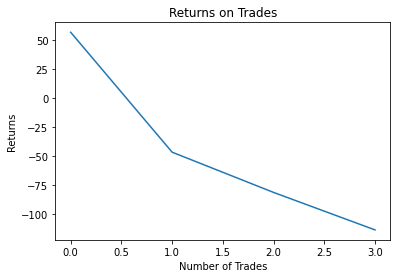

Year: 2012


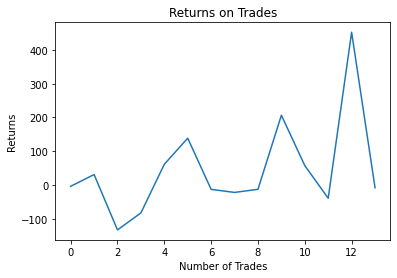

Year: 2013


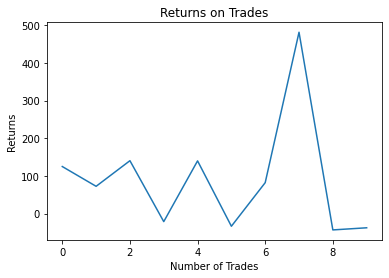

Year: 2014


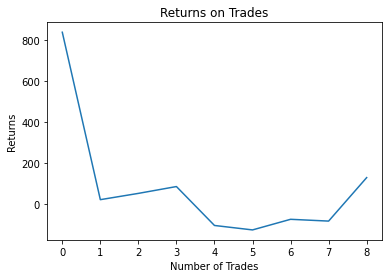

Year: 2015


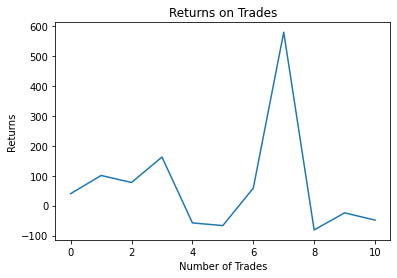

Year: 2016


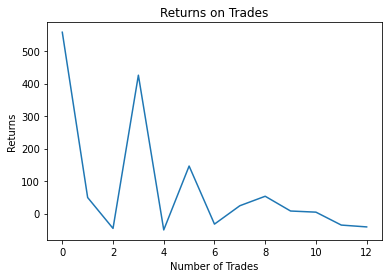

Year: 2017


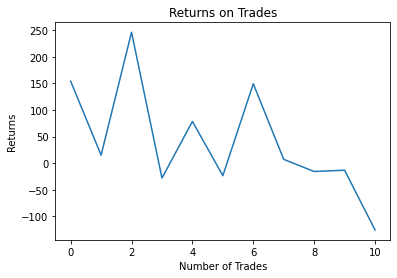

Year: 2018


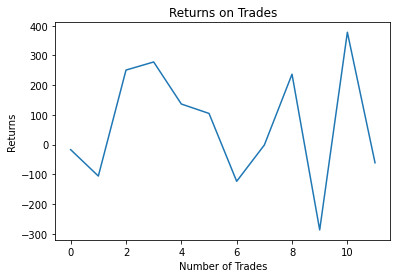

Year: 2019


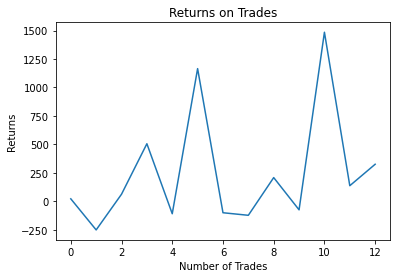

Year: 2020


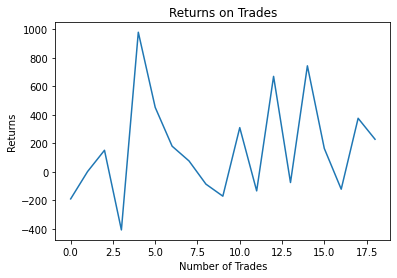

Year: 2021


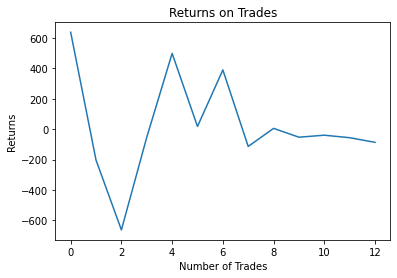

Year: 2022


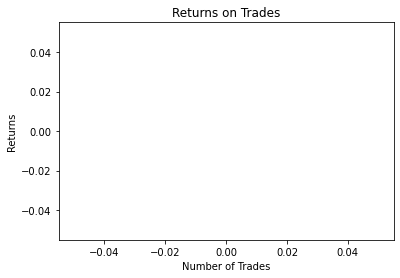

In [19]:
global cumulative_profit, cumulative_close_values
cumulative_profit = []
cumulative_close_values = []

for i in range(len(year_start_index_number)):
    start_index = year_start_index_number[i]
    if i < len(year_start_index_number)-1:
        end_index = year_start_index_number[i+1]
    profit_made, trades, year, all_close_values = execute_trade(start_index, end_index)
    save_output_parameters(profit_made, trades, year, all_close_values)
    print(f"Year: {year}")
    plot_returns(profit_made)

 ## Find Summary of All the Years

In [20]:
len(cumulative_profit)

129

In [21]:
win_trades = list(filter(lambda x: (x > 0), cumulative_profit))
loose_trades = list(filter(lambda x: (x < 0), cumulative_profit))

ws = wb["Summary"]

avg_index_val = round(mean(cumulative_close_values),2)
ws['f10'], ws['g10'] = "Averaeg Index Value", avg_index_val
ws['f11'], ws['g11'] = "Total Trades", len(cumulative_profit)
ws['f12'], ws['g12'] = "Total Win Trades", len(win_trades)
ws['f13'], ws['g13'] = "Total Loose Trades", len(loose_trades)
ws['f14'], ws['g14'] = "Hit Ratio/ Trade win Ratio", float(f'{len(win_trades)/len(cumulative_profit)*100:.2f}') if len(cumulative_profit) != 0 else "NA"
ws['f15'], ws['g15'] = "Day win Ratio", float(f'{len(win_trades)/len(loose_trades)*100:.2f}') if len(loose_trades) != 0 else "NA"
ws['f16'], ws['g16'] = "Gross Profit", sum(win_trades)
ws['f17'], ws['g17'] = "Gross Loss", sum(loose_trades)
ws['f18'], ws['g18'] = "Net Profit", sum(win_trades)+sum(loose_trades)
drawUp, drawUp_percentage = find_drawUp(cumulative_profit)
drawDown, drawDown_percentage = find_drawDown(cumulative_profit)
ws['f19'], ws['g19'] = "Max Draw Up", drawUp
ws['f20'], ws['g20'] = "Max Draw Down", drawDown
ws['f21'], ws['g21'] = "Draw UP Percentage", drawUp_percentage
ws['f22'], ws['g22'] = "Draw Down Percentage", drawDown_percentage
ws['f23'], ws['g23'] = "Average Trades", float(f"{ws['g18'].value/len(cumulative_profit):.2f}") if len(cumulative_profit) != 0 else "NA"
ws['f24'], ws['g24'] = "Average Winning Trade", float(f'{mean(win_trades):.2f}') if len(win_trades) != 0 else "NA"
ws['f25'], ws['g25'] = "Average Loosing Trade", float(f'{mean(loose_trades):.2f}') if len(loose_trades) != 0 else "NA"
ws['f26'], ws['g26'] = "Max Return/ Largest Winning Trade", max(win_trades) if len(win_trades) != 0 else "NA"
ws['f27'], ws['g27'] = "Min Return/ Largest Loosing Trade", min(loose_trades) if len(loose_trades) != 0 else "NA"
ws['f28'], ws['g28'] = "Risk Reward", round(ws['g26'].value/(-ws['g27'].value),2) if ws['g26'].value != "NA" and ws['g27'].value != "NA" else "NA"
ws['f29'], ws['g29'] = "Net Profit %", round(ws['g18'].value/ws['g10'].value*100,2) if ws['g10'].value != "NA" else "NA"
ws['f30'], ws['g30'] = "Sharpe Ratio", "???"

wb.save("Strategy 1.xlsx")

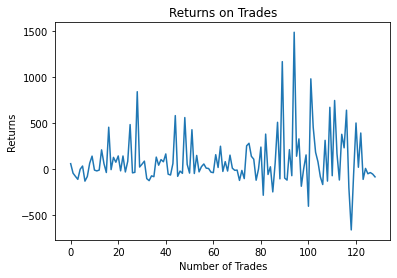

In [22]:
plot_returns(cumulative_profit)

## Finding Hyperparameter

In [23]:
nse_data.head()

,Date,Time,Open,High,Low,Close,SMA20,SMA50,SMA 100
0,2011-07-29,09:15:00,10820.65,10820.65,10758.40,10774.20,-1.0,-1.0,-1.0
1,2011-07-29,09:20:00,10774.20,10812.40,10774.20,10807.95,-1.0,-1.0,-1.0
2,2011-07-29,09:25:00,10807.95,10837.25,10804.35,10837.25,-1.0,-1.0,-1.0
3,2011-07-29,09:30:00,10836.05,10891.45,10835.60,10884.80,-1.0,-1.0,-1.0
4,2011-07-29,09:35:00,10884.80,10892.30,10871.85,10891.65,-1.0,-1.0,-1.0


In [24]:
nse_data["SMA20"] = nse_data["Close"].rolling(window=20).mean()
nse_data["SMA21"] = nse_data["Close"].rolling(window=21).mean()
nse_data["SMA34"] = nse_data["Close"].rolling(window=34).mean()

In [25]:
nse_data = nse_data.fillna(-1)
nse_data.tail()

,Date,Time,Open,High,Low,Close,SMA20,SMA50,SMA 100,SMA21,SMA34
192328,2022-01-24,15:05:00,36874.30,36946.70,36813.45,36946.70,36725.6400,36968.661,37242.978218,36729.009524,36827.233824
192329,2022-01-24,15:10:00,36946.55,37063.65,36929.50,37038.35,36735.3350,36960.372,37237.150000,36740.530952,36829.801471
192330,2022-01-24,15:15:00,37048.60,37073.95,36990.90,37050.30,36747.5000,36953.933,37231.681188,36750.333333,36831.750000
192331,2022-01-24,15:20:00,37047.80,37062.85,36894.25,36905.65,36751.2025,36944.372,37223.801980,36755.030952,36827.005882
192332,2022-01-24,15:25:00,36902.40,36945.05,36808.15,36834.90,36751.3125,36934.724,37215.664356,36755.188095,36819.972059


In [26]:
def execute_trade_for_ticks(tick):
    """
    End Index in not inclusive.
    
    """
    buying_mode = True
    profit_made_sma50 = []
    #trade_number = 1
    #trades = {}
    #all_close_values = []
    #year = nse_data.iloc[start_index]["Date"].year
    counter = 0
    
    for index in range(len(nse_data)):
        if buying_mode == True:  
            if counter == None:
                if nse_data["Time"][index] == dt.time(9,15,0):
                    counter = 0
                else:
                    continue
            if nse_data["Time"][index] == dt.time(9,15,0):
                counter = 0

            if nse_data["Close"][index] >= nse_data["SMA50"][index]:
                counter += 1
            else:
                counter = None

            #if nse_data["Time"][index] == dt.time(15,25,0):
            if counter == tick:
                # all ticks satisfied the condition
                # trigger buy
                buy_price = nse_data["Close"][index]
                buying_mode = False
                #trades[f"Trade {trade_number} Buy"] = nse_data.iloc[index:index+1,[0,1,5,7]]
                continue

        if buying_mode == False:
            #print(nse_data.iloc[index:index+1,[0,1, 5,7]])
            if nse_data["Close"][index] < nse_data["SMA50"][index]:
                #trades[f"Trade {trade_number} Sell"] = nse_data.iloc[index:index+1,[0,1,5,7]]
                selling_price = nse_data["Close"][index]
                profit_made = selling_price - buy_price
                #trades[f"Trade {trade_number} Profit"] = profit_made
                #trade_number += 1
                profit_made_sma50.append(profit_made)
                #all_close_values.extend([buy_price, selling_price])
                buying_mode = True
                
    #return (profit_made_sma50, trades, year, all_close_values)
    return sum(profit_made_sma50)

In [39]:
ticks_hyperparameter = {}

for tick in range(65,76):
    ticks_hyperparameter[tick] = round(execute_trade_for_ticks(tick),2)
    print(f"Completed Tick {tick}")

Completed Tick 65
Completed Tick 66
Completed Tick 67
Completed Tick 68
Completed Tick 69
Completed Tick 70
Completed Tick 71
Completed Tick 72
Completed Tick 73
Completed Tick 74
Completed Tick 75


In [40]:
ticks_hyperparameter

{65: 12567.5,
 66: 12514.2,
 67: 12423.85,
 68: 12347.65,
 69: 12498.95,
 70: 11813.1,
 71: 11917.5,
 72: 11709.05,
 73: 11626.15,
 74: 12120.9,
 75: 12027.1}

In [29]:
def plot_returns(returns):
    x = range(65,76)
    y = returns
    plt.plot(x, y)
    # plt.xlabel('')
    plt.ylabel('Returns')
    plt.ylabel('Number of Ticks')
    plt.title('Finding Hyperparameter for Ticks')
    plt.show()

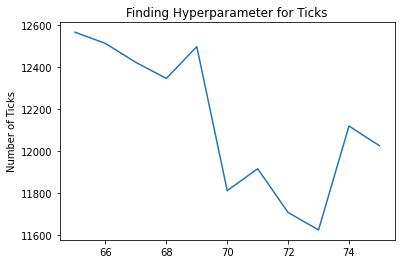

In [30]:
plot_returns(ticks_hyperparameter.values())

In [31]:
key, max_value = -1, -1
for key, value in ticks_hyperparameter.items():
    if value > max_value:
        max_value = value
        tick = key
print(tick)

65


In [32]:
def execute_trade_for_sma(tick,sma_value):
    """
    End Index in not inclusive.
    
    """
    buying_mode = True
    profit_made_sma50 = []
    sma = "SMA" + str(sma_value)
    counter = 0
    
    for index in range(len(nse_data)):
        if buying_mode == True:  
            if counter == None:
                if nse_data["Time"][index] == dt.time(9,15,0):
                    counter = 0
                else:
                    continue
            if nse_data["Time"][index] == dt.time(9,15,0):
                counter = 0

            if nse_data["Close"][index] >= nse_data[sma][index]:
                counter += 1
            else:
                counter = None

            #if nse_data["Time"][index] == dt.time(15,25,0):
            if counter == tick:
                # all ticks satisfied the condition
                # trigger buy
                buy_price = nse_data["Close"][index]
                buying_mode = False
                #trades[f"Trade {trade_number} Buy"] = nse_data.iloc[index:index+1,[0,1,5,7]]
                continue

        if buying_mode == False:
            #print(nse_data.iloc[index:index+1,[0,1, 5,7]])
            if nse_data["Close"][index] < nse_data[sma][index]:
                #trades[f"Trade {trade_number} Sell"] = nse_data.iloc[index:index+1,[0,1,5,7]]
                selling_price = nse_data["Close"][index]
                profit_made = selling_price - buy_price
                #trades[f"Trade {trade_number} Profit"] = profit_made
                #trade_number += 1
                profit_made_sma50.append(profit_made)
                #all_close_values.extend([buy_price, selling_price])
                buying_mode = True
                
    #return (profit_made_sma50, trades, year, all_close_values)
    return sum(profit_made_sma50)

In [41]:
sma_hyperparameter = {}
tick_and_sma = [(65,34),(69,34),(65,50),(69,50),(75,50)]

for tick_sma_pair in tick_and_sma:
    tick, sma_value = tick_sma_pair[0], tick_sma_pair[1]
    sma_hyperparameter[(tick,sma_value)] = execute_trade_for_sma(tick, sma_value)
    print(f"Completed for {tick}, SMA{sma_value}: {round(sma_hyperparameter[(tick,sma_value)],2)}")

Completed for 65, SMA34: 3719.45
Completed for 69, SMA34: 3237.8
Completed for 65, SMA50: 12567.5
Completed for 69, SMA50: 12498.95
Completed for 75, SMA50: 12027.1


In [43]:
key, max_value = -1, -1
for key, value in sma_hyperparameter.items():
    if value > max_value:
        max_value = value
        sma = key
print(sma)

(65, 50)


In [50]:
def plot_sma(sma_hp):
    x = range(1,6)
    y = sma_hp.values()
    plt.plot(x, y)
    # plt.xlabel('')
    plt.ylabel('Returns')
    plt.xlabel('Tick SMA Value')
    plt.title('Finding Hyperparameter for SMA')
    plt.show()

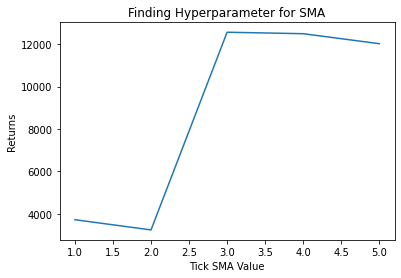

In [51]:
plot_sma(sma_hyperparameter)